In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files

# Upload CSV file
csv_file = files.upload()

Saving QVI_purchase_behaviour.csv to QVI_purchase_behaviour (1).csv


In [ ]:


xlsx_file = files.upload()

# Assuming there is only one file uploaded, we extract its content
file_name = list(xlsx_file.keys())[0]
file_content = xlsx_file[file_name]

df = pd.read_excel(file_content)
df.to_csv('QVI_transaction_data.csv', index=False)

Saving QVI_transaction_data.xlsx to QVI_transaction_data (1).xlsx


In [ ]:
transactionData = pd.read_csv("QVI_transaction_data.csv")
customerData = pd.read_csv("QVI_purchase_behaviour.csv")

Examine transaction data Over to you! Examine the data using one or more of the methods described above.

In [ ]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
transactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [ ]:
transactionData.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [ ]:
transactionData.shape

(264836, 8)

Convert DATE column to a date format. A quick search online tells us that CSV and Excel integer dates begin on 30 Dec 1899

---



In [ ]:
transactionData['DATE'] = pd.to_datetime(transactionData['DATE'],origin = ' 1899-12-20')

In [ ]:
transactionData['DATE'].head()

0   1899-12-20 00:00:00.000043390
1   1899-12-20 00:00:00.000043599
2   1899-12-20 00:00:00.000043605
3   1899-12-20 00:00:00.000043329
4   1899-12-20 00:00:00.000043330
Name: DATE, dtype: datetime64[ns]

Examine PROD_NAME Over to you! Generate a summary of the PROD_NAME column.

In [ ]:
transactionData['PROD_NAME'].describe()

count                                     264836
unique                                       114
top       Kettle Mozzarella   Basil & Pesto 175g
freq                                        3304
Name: PROD_NAME, dtype: object

Examine the words in PROD_NAME to see if there are any incorrect entries such as products that are not chips

In [ ]:
prod_name = pd.DataFrame(np.unique(transactionData['PROD_NAME'].str.lower().str.split()))
prod_name.columns = ['Ingredients']
prod_name

,Ingredients
0,"[burger, rings, 220g]"
1,"[ccs, nacho, cheese, 175g]"
2,"[ccs, original, 175g]"
3,"[ccs, tasty, cheese, 175g]"
4,"[cheetos, chs, &, bacon, balls, 190g]"
...,...
109,"[ww, d/style, chip, sea, salt, 200g]"
110,"[ww, original, corn, chips, 200g]"
111,"[ww, original, stacked, chips, 160g]"
112,"[ww, sour, cream, &onionstacked, chips, 160g]"


Remove digits and special characters, and convert to lowercase

In [ ]:
 transactionData['PROD_NAME'] = transactionData['PROD_NAME'].str.replace('^[a-zA-Z\s]','').str.lower()
 transactionData['PROD_NAME'] .head()

<ipython-input-49-95595355db98>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  transactionData['PROD_NAME'] = transactionData['PROD_NAME'].str.replace('^[a-zA-Z\s]','').str.lower()


0      tural chip        compny seasalt175g
1                    s nacho cheese    175g
2      iths crinkle cut  chips chicken 170g
3      iths chip thinly  s/cream&onion 175g
4    ttle tortilla chpshny&jlpno chili 150g
Name: PROD_NAME, dtype: object

Count the frequency of each word

In [ ]:
prod_counts = transactionData['PROD_NAME'].str.split().explode().value_counts()
prod_count = pd.DataFrame(prod_counts)
prod_count = prod_counts.reset_index()
prod_count.columns = ['Word', 'Count']
prod_count

,Word,Count
0,175g,60561
1,chips,49770
2,150g,43131
3,ttle,41288
4,&,35565
...,...,...
212,pc,1431
213,garden,1419
214,c,1419
215,ench,1418


In [ ]:
sorted_df = prod_count.sort_values(by='Count', ascending=False)

In [ ]:
word_counts = transactionData['PROD_NAME'].str.split().explode().value_counts()
sorted_words = word_counts.index.sort_values(ascending=False)

 Filter out salsa products


In [ ]:
# Cotains SALSA
transactionData[transactionData['PROD_NAME'].str.contains('Salsa', case=False)]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
5,1899-12-20 00:00:00.000043604,4,4074,2982,57,d el paso salsa dip tomato mild 300g,1,5.1
25,1899-12-20 00:00:00.000043600,39,39144,35506,57,d el paso salsa dip tomato mild 300g,1,5.1
32,1899-12-20 00:00:00.000043605,45,45127,41122,64,d rock deli sr salsa & mzzrlla 150g,2,5.4
44,1899-12-20 00:00:00.000043330,56,56013,50090,39,iths crinkle cut tomato salsa 150g,1,2.6
63,1899-12-20 00:00:00.000043600,82,82480,82047,101,ritos salsa medium 300g,1,2.6
...,...,...,...,...,...,...,...,...
264675,1899-12-20 00:00:00.000043575,265,265103,263419,59,d el paso salsa dip tomato med 300g,1,5.1
264678,1899-12-20 00:00:00.000043554,265,265111,263428,35,olworths mild salsa 300g,1,1.5
264719,1899-12-20 00:00:00.000043401,266,266278,264104,39,iths crinkle cut tomato salsa 150g,1,2.6
264734,1899-12-20 00:00:00.000043476,267,267324,264374,41,ritos salsa mild 300g,1,2.6


In [ ]:
# does not Cotain SALSA
transactionData[~transactionData['PROD_NAME'].str.contains('Salsa', case=False)] #Case_sensitive

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1899-12-20 00:00:00.000043390,1,1000,1,5,tural chip compny seasalt175g,2,6.0
1,1899-12-20 00:00:00.000043599,1,1307,348,66,s nacho cheese 175g,3,6.3
2,1899-12-20 00:00:00.000043605,1,1343,383,61,iths crinkle cut chips chicken 170g,2,2.9
3,1899-12-20 00:00:00.000043329,2,2373,974,69,iths chip thinly s/cream&onion 175g,5,15.0
4,1899-12-20 00:00:00.000043330,2,2426,1038,108,ttle tortilla chpshny&jlpno chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,1899-12-20 00:00:00.000043533,272,272319,270088,89,ttle sweet chilli and sour cream 175g,2,10.8
264832,1899-12-20 00:00:00.000043325,272,272358,270154,74,stitos splash of lime 175g,1,4.4
264833,1899-12-20 00:00:00.000043410,272,272379,270187,51,ritos mexicana 170g,2,8.8
264834,1899-12-20 00:00:00.000043461,272,272379,270188,42,ritos corn chip mexican jalapeno 150g,2,7.8


In [ ]:
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1899-12-20 00:00:00.000043390,1,1000,1,5,tural chip compny seasalt175g,2,6.0
1,1899-12-20 00:00:00.000043599,1,1307,348,66,s nacho cheese 175g,3,6.3
2,1899-12-20 00:00:00.000043605,1,1343,383,61,iths crinkle cut chips chicken 170g,2,2.9
3,1899-12-20 00:00:00.000043329,2,2373,974,69,iths chip thinly s/cream&onion 175g,5,15.0
4,1899-12-20 00:00:00.000043330,2,2426,1038,108,ttle tortilla chpshny&jlpno chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,1899-12-20 00:00:00.000043533,272,272319,270088,89,ttle sweet chilli and sour cream 175g,2,10.8
264832,1899-12-20 00:00:00.000043325,272,272358,270154,74,stitos splash of lime 175g,1,4.4
264833,1899-12-20 00:00:00.000043410,272,272379,270187,51,ritos mexicana 170g,2,8.8
264834,1899-12-20 00:00:00.000043461,272,272379,270188,42,ritos corn chip mexican jalapeno 150g,2,7.8


 Reset the index if needed


In [ ]:
transactionData.reset_index(drop = True ,inplace =True)

To check for null values in the transactionData DataFrame,


In [ ]:
transactionData.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

if you want to check the percentage of null values in each column


In [ ]:
transactionData.isnull().mean()*100

DATE              0.0
STORE_NBR         0.0
LYLTY_CARD_NBR    0.0
TXN_ID            0.0
PROD_NBR          0.0
PROD_NAME         0.0
PROD_QTY          0.0
TOT_SALES         0.0
dtype: float64

Calculate descriptive statistics of numerical columns


In [ ]:
transactionData.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


Create box plots for numerical columns





<Axes: >

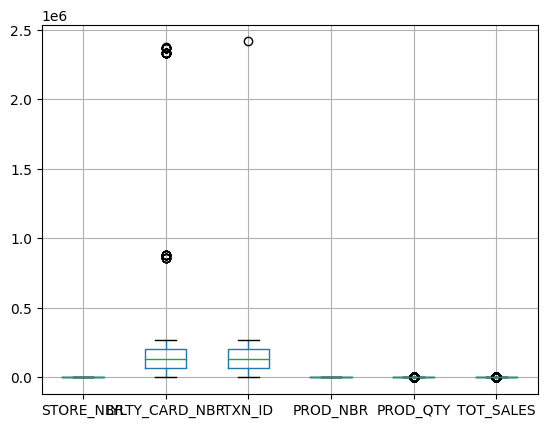

In [ ]:
#just numericalcolumns plot
transactionData.boxplot(column=[ 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY', 'TOT_SALES'])

In [ ]:
transactionData.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

Create histograms for numerical *columns*

array([[<Axes: title={'center': 'STORE_NBR'}>,
        <Axes: title={'center': 'LYLTY_CARD_NBR'}>],
       [<Axes: title={'center': 'TXN_ID'}>,
        <Axes: title={'center': 'PROD_NBR'}>],
       [<Axes: title={'center': 'PROD_QTY'}>,
        <Axes: title={'center': 'TOT_SALES'}>]], dtype=object)

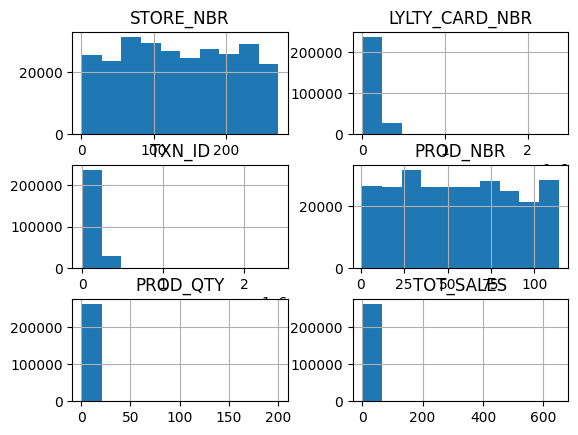

In [ ]:
transactionData.hist([ 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_QTY', 'TOT_SALES'])

Filter the dataset to find the outlier                                       Over to you! Use a filter to examine the transactions in question.

In [ ]:
transactionData.mean()

<ipython-input-63-c86258a736ac>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  transactionData.mean()
<ipython-input-63-c86258a736ac>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  transactionData.mean()


STORE_NBR            135.080110
LYLTY_CARD_NBR    135549.476404
TXN_ID            135158.310815
PROD_NBR              56.583157
PROD_QTY               1.907309
TOT_SALES              7.304200
dtype: float64

In [ ]:
# Calculate z-scores for each numerical column

numeric_columns = transactionData.select_dtypes(include=np.number).columns

# Calculate z-scores for each numeric column
z_scores = (transactionData[numeric_columns] - transactionData[numeric_columns].mean()) / transactionData[numeric_columns].std()

z_scores

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,-1.746194,-1.669763,-1.729836,-1.571381,0.144008,-0.422998
1,-1.746194,-1.665953,-1.725395,0.286866,1.697638,-0.325698
2,-1.746194,-1.665506,-1.724947,0.134551,0.144008,-1.428439
3,-1.733171,-1.652724,-1.717383,0.378255,4.804897,2.496022
4,-1.733171,-1.652066,-1.716564,1.566315,1.697638,2.106820
...,...,...,...,...,...,...
264831,1.783178,1.697314,1.726923,0.987516,0.144008,1.133813
264832,1.783178,1.697798,1.727767,0.530570,-1.409622,-0.941935
264833,1.783178,1.698059,1.728190,-0.170080,0.144008,0.485141
264834,1.783178,1.698059,1.728202,-0.444248,0.144008,0.160806


In [ ]:
# Define a threshold for outlier detection (e.g., z-score > 3 or < -3)
threshold = 3

# Create a boolean mask to identify outlier transactions
outlier_mask = (z_scores > threshold) | (z_scores < -threshold)

In [ ]:
# Apply the mask to the DataFrame to filter outlier transactions
outlier_transactions = transactionData[outlier_mask.any(axis=1)]
outlier_transactions

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
3,1899-12-20 00:00:00.000043329,2,2373,974,69,iths chip thinly s/cream&onion 175g,5,15.0
11,1899-12-20 00:00:00.000043332,8,8294,8221,114,ttle sensations siracha lime 150g,5,23.0
16,1899-12-20 00:00:00.000043330,20,20418,17413,94,rger rings 220g,4,9.2
31,1899-12-20 00:00:00.000043600,43,43227,40186,26,ingles sweet&spcy bbq 134g,4,14.8
56,1899-12-20 00:00:00.000043601,74,74336,73182,84,nwves plus btroot & chilli jam 180g,5,15.5
...,...,...,...,...,...,...,...,...
258721,1899-12-20 00:00:00.000043327,200,200248,199694,3,ttle sensations camembert & fig 150g,4,18.4
258726,1899-12-20 00:00:00.000043332,203,203253,203360,28,ins potato chips hot & spicy 175g,5,16.5
258729,1899-12-20 00:00:00.000043601,208,208205,207318,37,iths thinly swt chli&s/cream175g,5,15.0
258759,1899-12-20 00:00:00.000043599,238,238169,242560,44,ins chips light& tangy 175g,4,13.2


Let's see if the customer has had other transactions. Over to you! Use a filter to see what other transactions that customer made.


 Filter out the customer based on the loyalty card number

In [ ]:
#the identifier of the customer I want to filter
loyalty_card = ' 12345678'
customer_transaction= [transactionData['LYLTY_CARD_NBR'] == loyalty_card ]

In [ ]:
# Display the transaction
customer_transaction

[0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 264831    False
 264832    False
 264833    False
 264834    False
 264835    False
 Name: LYLTY_CARD_NBR, Length: 264836, dtype: bool]

Count the number of transactions by date

In [ ]:
# Over to you! Create a summary of transaction count by date.
transaction_count_by_date = transactionData['DATE'].value_counts().sort_index()
transaction_count_by_date

1899-12-20 00:00:00.000043282    724
1899-12-20 00:00:00.000043283    711
1899-12-20 00:00:00.000043284    722
1899-12-20 00:00:00.000043285    714
1899-12-20 00:00:00.000043286    712
                                ... 
1899-12-20 00:00:00.000043642    723
1899-12-20 00:00:00.000043643    709
1899-12-20 00:00:00.000043644    730
1899-12-20 00:00:00.000043645    745
1899-12-20 00:00:00.000043646    744
Name: DATE, Length: 364, dtype: int64

In [ ]:
transactionData['DATE'].value_counts().sort_values(ascending=True)

1899-12-20 00:00:00.000043429    648
1899-12-20 00:00:00.000043391    658
1899-12-20 00:00:00.000043629    659
1899-12-20 00:00:00.000043640    662
1899-12-20 00:00:00.000043446    664
                                ... 
1899-12-20 00:00:00.000043452    862
1899-12-20 00:00:00.000043453    906
1899-12-20 00:00:00.000043456    915
1899-12-20 00:00:00.000043457    917
1899-12-20 00:00:00.000043458    939
Name: DATE, Length: 364, dtype: int64

Create a sequence of dates and join this with the count of transactions by date
Over to you! Create a column of dates that includes every day from 1 Jul 2018 to 30 Jun 2019, and join it onto the data to fill in the missing days.


In [ ]:
# Create a sequence of dates from 1 Jul 2018 to 30 Jun 2019
start_date = pd.to_datetime('2018-07-01')
end_date = pd.to_datetime('2019-06-30')
dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Create a DataFrame with the dates
date_df = pd.DataFrame({'DATE': dates})

# Merge the date_df with transactionData to fill in the missing days
merged_data = pd.merge(date_df, transactionData, on='DATE', how='left')

# Fill in missing transactions with 0
merged_data['TRANSACTION_COUNT'] = merged_data.groupby('DATE')['TXN_ID'].transform('count')
merged_data['TRANSACTION_COUNT'].fillna(0, inplace=True)

In [ ]:
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,1899-12-20 00:00:00.000043390,1,1000,1,5,atural chip compny seasalt175g,2,6.0,175
1,1899-12-20 00:00:00.000043599,1,1307,348,66,cs nacho cheese 175g,3,6.3,175
2,1899-12-20 00:00:00.000043605,1,1343,383,61,miths crinkle cut chips chicken 170g,2,2.9,170
3,1899-12-20 00:00:00.000043329,2,2373,974,69,miths chip thinly s/cream&onion 175g,5,15.0,175
4,1899-12-20 00:00:00.000043330,2,2426,1038,108,ettle tortilla chpshny&jlpno chili 150g,3,13.8,150
...,...,...,...,...,...,...,...,...,...
264831,1899-12-20 00:00:00.000043533,272,272319,270088,89,ettle sweet chilli and sour cream 175g,2,10.8,175
264832,1899-12-20 00:00:00.000043325,272,272358,270154,74,ostitos splash of lime 175g,1,4.4,175
264833,1899-12-20 00:00:00.000043410,272,272379,270187,51,oritos mexicana 170g,2,8.8,170
264834,1899-12-20 00:00:00.000043461,272,272379,270188,42,oritos corn chip mexican jalapeno 150g,2,7.8,150


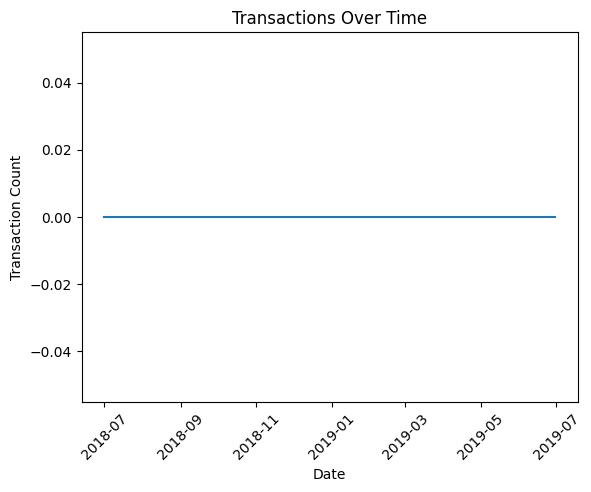

In [ ]:
# Plot transactions over time
plt.plot(merged_data['DATE'], merged_data['TRANSACTION_COUNT'])
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.title('Transactions Over Time')
plt.xticks(rotation=45)
plt.show()

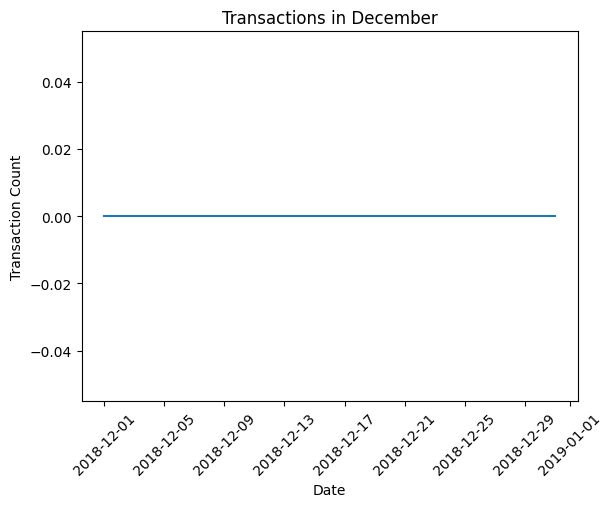

In [ ]:
# Filter data for December
december_data = merged_data[merged_data['DATE'].dt.month == 12]

# Plot transactions for individual days in December
plt.plot(december_data['DATE'], december_data['TRANSACTION_COUNT'])
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.title('Transactions in December')
plt.xticks(rotation=45)
plt.show()

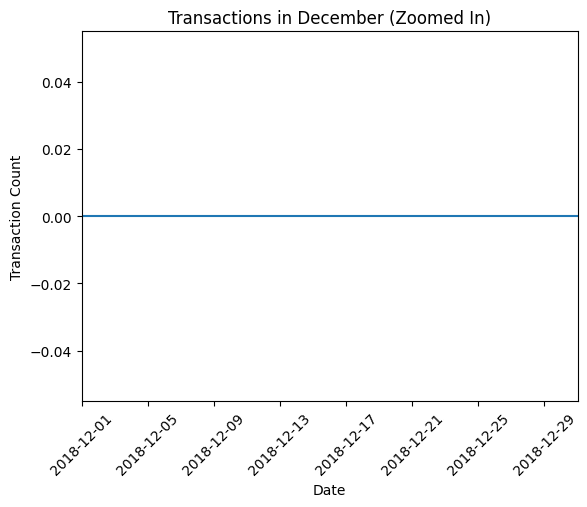

In [ ]:
# Filter data for December
december_data = merged_data[merged_data['DATE'].dt.month == 12]

# Plot transactions for individual days in December (zoomed in)
plt.plot(december_data['DATE'], december_data['TRANSACTION_COUNT'])
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.title('Transactions in December (Zoomed In)')
plt.xticks(rotation=45)

# Set x-axis limits to zoom in to relevant dates
start_date = pd.to_datetime('2018-12-01')
end_date = pd.to_datetime('2018-12-31')
plt.xlim(start_date, end_date)

plt.show()

In [ ]:
#### Pack size
#### We can work this out by taking the digits that are in PROD_NAME
transactionData['PACK_SIZE'] = transactionData['PROD_NAME'].str.extract('(\d+)').astype(int)

In [ ]:
transactionData['PACK_SIZE'].value_counts()

175    66390
150    43131
134    25102
110    22387
170    19983
165    15297
300    15166
330    12540
380     6418
270     6285
210     6272
200     4473
135     3257
250     3169
90      3008
190     2995
160     2970
220     1564
70      1507
180     1468
125     1454
Name: PACK_SIZE, dtype: int64

In [ ]:
#### Examine the pack size column
# Over to you! Generate a summary of the PACK_SIZE column.
pz = transactionData['PACK_SIZE'].value_counts()
pz = pz.reset_index().rename(columns={'index': 'PACK_SIZE', 'PACK_SIZE': 'FREQUENCY'})
pz

,PACK_SIZE,FREQUENCY
0,175,66390
1,150,43131
2,134,25102
3,110,22387
4,170,19983
5,165,15297
6,300,15166
7,330,12540
8,380,6418
9,270,6285


<Axes: ylabel='Frequency'>

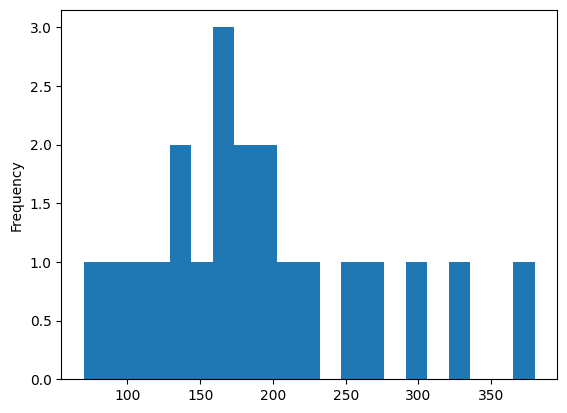

In [ ]:
#### Pack size distribution
# Over to you! Create a histogram to visualize the distribution of pack sizes.
pz['PACK_SIZE'].plot(kind='hist',bins = 21)

In [ ]:
transactionData.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE'],
      dtype='object')

In [ ]:
#### Examine the price per unit
# Over to you! Generate a summary of the PRICE_PER_UNIT column.
transactionData['PRICE_PER_UNIT'].describe()

KeyError: ignored

In [ ]:
#### Price per unit distribution
# Over to you! Create a histogram to visualize the distribution of price per unit.
transactionData['PRICE_PER_UNIT'].plot(kind='hist')
plt.xlabel('Price per Unit')
plt.ylabel('Frequency')
plt.title('Distribution of Price per Unit')
plt.show()

KeyError: ignored

In [ ]:
#### Price per unit by brand
# Over to you! Calculate the average price per unit for each brand
average_price_per_brand = transactionData.groupby('BRAND')['PRICE_PER_UNIT'].mean()
average_price_per_brand = pd.DataFrame(average_price_per_brand)
average_price_per_brand = average_price_per_brand.reset_index()
plt.bar(average_price_per_brand['BRAND'],average_price_per_brand['PRICE_PER_UNIT'])
plt.xticks(rotation =90)
plt.show()

KeyError: ignored

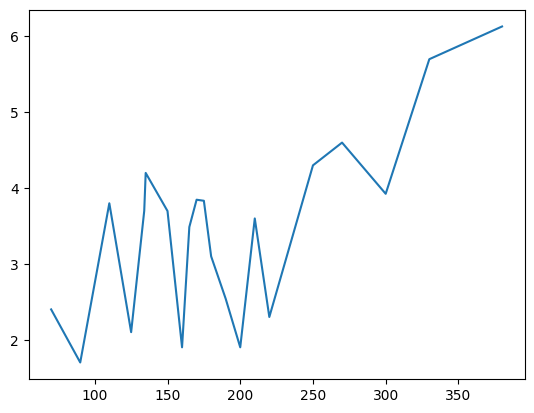

In [ ]:
#### Price per unit by pack size
# Over to you! Calculate the average price per unit for each pack size.
average_price_per_brand = transactionData.groupby('PACK_SIZE')['PRICE_PER_UNIT'].mean()
average_price_per_brand = pd.DataFrame(average_price_per_brand)
average_price_per_brand = average_price_per_brand.reset_index()
plt.plot(average_price_per_brand['PACK_SIZE'],average_price_per_brand['PRICE_PER_UNIT'])


In [ ]:
transactionData.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE'],
      dtype='object')

In [ ]:
#### Brands
#### Extract brand names from PROD_NAME
transactionData['BRAND'] = transactionData['PROD_NAME'].str.extract('([a-zA-Z]+)')

In [ ]:
transactionData['BRAND'].describe()

count     264836
unique        29
top        ettle
freq       41288
Name: BRAND, dtype: object

In [ ]:
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,1899-12-20 00:00:00.000043390,1,1000,1,5,atural chip compny seasalt175g,2,6.0,175,atural
1,1899-12-20 00:00:00.000043599,1,1307,348,66,cs nacho cheese 175g,3,6.3,175,cs
2,1899-12-20 00:00:00.000043605,1,1343,383,61,miths crinkle cut chips chicken 170g,2,2.9,170,miths
3,1899-12-20 00:00:00.000043329,2,2373,974,69,miths chip thinly s/cream&onion 175g,5,15.0,175,miths
4,1899-12-20 00:00:00.000043330,2,2426,1038,108,ettle tortilla chpshny&jlpno chili 150g,3,13.8,150,ettle
...,...,...,...,...,...,...,...,...,...,...
264831,1899-12-20 00:00:00.000043533,272,272319,270088,89,ettle sweet chilli and sour cream 175g,2,10.8,175,ettle
264832,1899-12-20 00:00:00.000043325,272,272358,270154,74,ostitos splash of lime 175g,1,4.4,175,ostitos
264833,1899-12-20 00:00:00.000043410,272,272379,270187,51,oritos mexicana 170g,2,8.8,170,oritos
264834,1899-12-20 00:00:00.000043461,272,272379,270188,42,oritos corn chip mexican jalapeno 150g,2,7.8,150,oritos


In [ ]:
#### Brand market share
# Over to you! Calculate the market share for each brand.
brand_sales = transactionData.groupby('BRAND')['TOT_SALES'].sum()
total_sales = brand_sales.sum()
market_share = (brand_sales / total_sales) * 100
market_share

BRAND
atural        1.771698
cc            0.415940
cs            0.934593
ed            1.555587
ettle        20.173530
heetos        0.872848
heezels       2.069354
hins          4.593249
ld            4.693155
mith          0.753892
miths        10.859965
nbts          0.262415
nfuzions      3.941636
nfzns         1.178651
obs           3.648121
oolworths     0.695513
orito         2.086005
oritos       10.418597
ostitos       4.124741
rain          2.225417
rd            3.357837
rench         0.409891
ringles       9.183939
rnwves        0.442945
unbites       0.237808
urger         0.353130
w             1.855315
wisties       4.214303
yrrells       2.669923
Name: TOT_SALES, dtype: float64

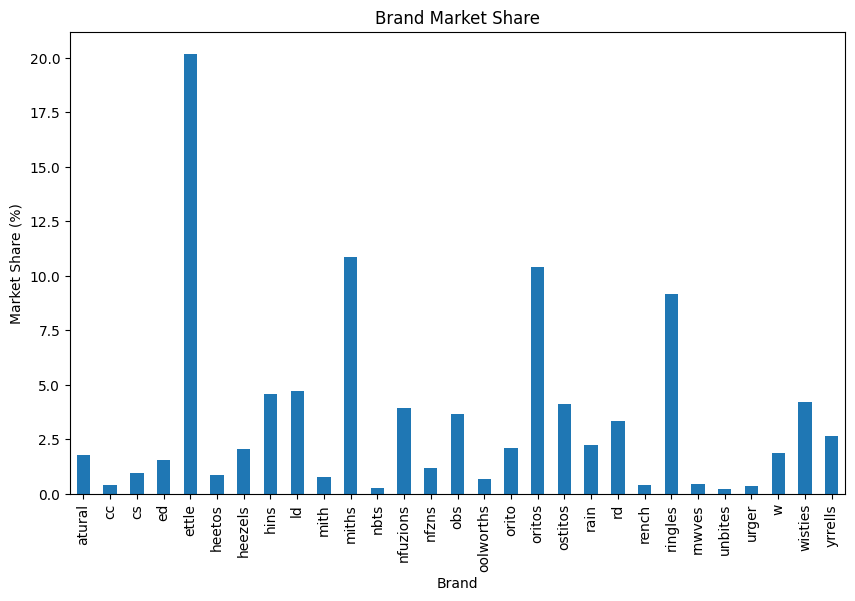

In [ ]:
#### Plot brand market share
# Over to you! Create a bar plot to visualize the brand market share.
plt.figure(figsize=(10, 6))
market_share.plot(kind='bar')
plt.title('Brand Market Share')
plt.xlabel('Brand')
plt.ylabel('Market Share (%)')
plt.xticks(rotation=90)
plt.show()

0          Natural
1                C
2           Smiths
3           Smiths
4           Kettle
            ...   
264831      Kettle
264832    Tostitos
264833     Doritos
264834     Doritos
264835    Tostitos
Name: BRAND, Length: 264836, dtype: object


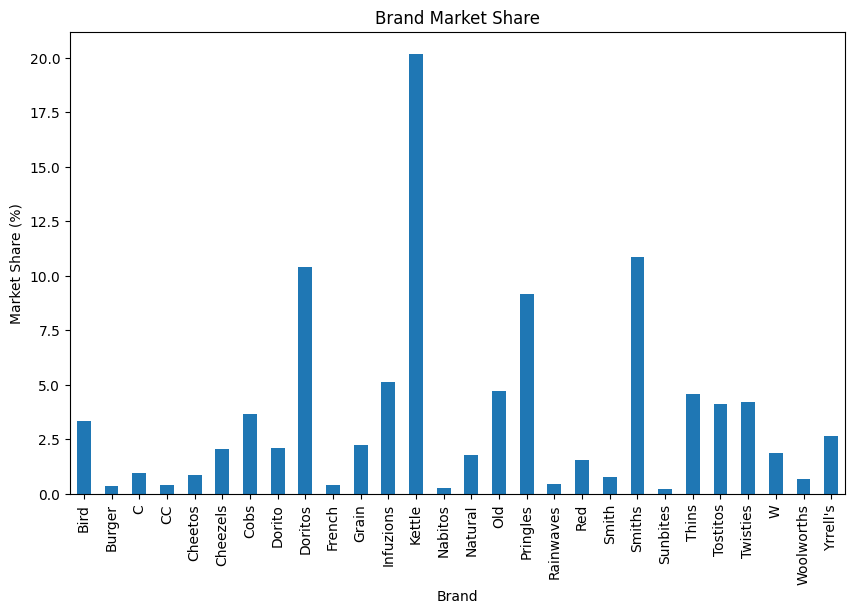

In [ ]:
#### Tidy up brands
# Over to you! Combine similar brands and update the brand market share.
import pandas as pd
import matplotlib.pyplot as plt

# Define a mapping of similar brands to be combined
brand_mapping = {
    'atural': 'Natural',
    'cs': 'C',
    'miths': 'Smiths',
    'ettle': 'Kettle',
    'ld': 'Old',
    'rain': 'Grain',
    'oritos': 'Doritos',
    'wisties': 'Twisties',
    'w': 'W',
    'hins': 'Thins',
    'urger': 'Burger',
    'cc': 'CC',
    'heezels': 'Cheezels',
    'nfzns': 'Infuzions',
    'ed': 'Red',
    'ringles': 'Pringles',
    'orito': 'Dorito',
    'nfuzions': 'Infuzions',
    'mith': 'Smith',
    'rnwves': 'Rainwaves',
    'yrrells': "Yrrell's",
    'obs': 'Cobs',
    'oolworths': 'Woolworths',
    'rench': 'French',
    'rd': 'Bird',
    'ostitos': 'Tostitos',
    'heetos': 'Cheetos',
    'nbts': 'Nabitos',
    'unbites': 'Sunbites'
}

# Update the 'BRAND' column in the transactionData DataFrame using the brand_mapping
transactionData['BRAND'] = transactionData['BRAND'].replace(brand_mapping)
print(transactionData['BRAND'])
# Recalculate the brand sales and market share
brand_sales = transactionData.groupby('BRAND')['TOT_SALES'].sum()
total_sales = brand_sales.sum()
market_share = (brand_sales / total_sales) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
market_share.plot(kind='bar')
plt.title('Brand Market Share')
plt.xlabel('Brand')
plt.ylabel('Market Share (%)')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#### Create a new column for the price per unit
transactionData['PRICE_PER_UNIT'] = transactionData['TOT_SALES'] / transactionData['PROD_QTY']